In [17]:
from package.temp_package import *



pathway=Reader.get_UpperPath('.')+'/190709github_package_data/Kapture787EC_17-49-35.csv'
Reader.figure(path=pathway)
raw=Reader.export()



#plt.plot(raw[:,1:4])

#plt.plot(raw[:,8:12])

#
adp=Adp_wistron2('220426',0,0,0,False)
beta=0.05
dev01=IMU(adp,mag_on=False,beta=beta,mag_cali_on=False,acc_cali_on=False)
plt.title('acc_magnitude')
plt.plot(dev01.accMag)
plt.plot(np.ones(len(dev01.accMag)))
dev01.show_raw()

dev01.acc_new =np.copy(dev01.acc.values)
dev01.acc_mag_new=np.copy(dev01.accMag)
for i in range(len(dev01.acc.values)):
    q=Quaternion(adp.quaternion.values[i,0],adp.quaternion.values[i,1],adp.quaternion.values[i,2],adp.quaternion.values[i,3])
    vec=Quaternion(0,adp.acc.values[i,0],adp.acc.values[i,1],adp.acc.values[i,2])
    out=q*vec*(q.conj())
    dev01.acc_new[i,:]=np.array([out[1],out[2],out[3]])
    dev01.acc_mag_new[i]=(dev01.acc_new[i,0]**2+dev01.acc_new[i,1]**2+dev01.acc_new[i,2]**2)**0.5
#    print(i)

dev01.acc_new=Signal(dev01.acc_new)

plt.plot(dev01.acc_new.values)
#q1=Quaternion(0.707,0,0,0.707)
#q2=Quaternion(0.707,0.707,0,0)
##q3=q1*q2
#vec=Quaternion(0,1,0,0)
##print(q3._q)
##
#out=q1*vec*(q1.conj())
#print(out._q)
dev01.acc=dev01.acc_new
dev01.accMag=Signal(dev01.accMag)
dev01.acc.values*=9.81
dev01.acc.values[:,2]-=9.81
dev01.position=Signal(np.zeros(dev01.acc.values.shape))

dev01.velocity=Signal.copy(dev01.position)
#plt.plot(dev01.position.values)
dev01.sampleperiod=1/45
#
plt.title('acc_mag')
plt.plot(dev01.accMag.values)
plt.show()
#
#dev01.accMag=Signal(dev01.accMag)
#b, a = sp.signal.butter(4, 0.001/(30), btype = 'highpass')
#dev01.accMag.values = sp.signal.filtfilt(b, a, dev01.accMag.values,axis=0)
#
#plt.title('acc_mag (after highpass)')
#plt.plot(dev01.accMag.values)
#plt.show()
#dev01.accMag.values=abs(dev01.accMag.values)
##
#b, a = sp.signal.butter(4, 5/(30), btype = 'lowpass')
#dev01.accMag.values = sp.signal.filtfilt(b, a, dev01.accMag.values,axis=0)
#plt.title('acc_mag (after lowpass)')
#plt.plot(dev01.accMag.values)
#
#plt.show()

for i in range(dev01.acc.length):
    if i==0:
        dev01.velocity.values[i]=dev01.acc.values[i]*dev01.sampleperiod
    elif abs(dev01.accMag.values[i])<0.078*9.8:#0.004-0.006
        dev01.velocity.values[i]=0
    else:
        dev01.velocity.values[i]=dev01.acc.values[i]*dev01.sampleperiod+dev01.velocity.values[i-1]
        
for i in range(dev01.acc.length):
    if i==0:
        dev01.position.values[i]=dev01.velocity.values[i]*dev01.sampleperiod
        
    else:
        if abs(dev01.accMag.values[i])<0.078*9.8:#0.004-0.006
            dev01.position.values[i]=dev01.velocity.values[i]*dev01.sampleperiod+dev01.position.values[i-1]
#            dev01.position.values[i,2]=0
            pass
        else:
            dev01.position.values[i]=dev01.velocity.values[i]*dev01.sampleperiod+dev01.position.values[i-1]
#plt.plot(dev01.accMag.values)
plt.title('c707d velocity')
plt.plot(dev01.velocity.values[:,0],label='x')    
plt.plot(dev01.velocity.values[:,1],label='y')    
plt.plot(dev01.velocity.values[:,2],label='z')    
plt.legend()
plt.grid()
plt.show()



#plt.scatter(dev01.position.values[:100,0],dev01.position.values[:100,1], label='path') 
#plt.grid()
#plt.legend()
#plt.show()
#
#
#plt.scatter(dev01.position.values[100:,0],dev01.position.values[100:,1], label='path') 
#plt.grid()
#plt.legend()
#plt.show()
plt.title('c707d position')
plt.scatter(dev01.position.values[:,0],dev01.position.values[:,1], label='path') 
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()



## dont do below
#t=20
#freq=50
#x=np.linspace(0,t,t*freq)
#y=np.sin(ts)*2*np.pi*freq
#plt.scatter(x,y, label='artificail signal') 
#plt.grid()
#plt.xlabel('x')
#plt.ylabel('t')
#plt.legend()
#plt.show()
#
#
x=dev01.position.values[:,0]
y=dev01.position.values[:,1]
z=dev01.position.values[:,2]
#ani=Animation(x,y)
#ani.animateGenerate()
##
fig=plt.figure()
axis=plt.axes(xlim=(np.min(x),np.max(x)),ylim=(np.min(y),np.max(y)))
line, =axis.plot([],[],lw=2)
def init():
    line.set_data([],[])
    return line,
xdata, ydata=[],[]
def animate(i):
    xdata.append(x[i])
    ydata.append(y[i])
    line.set_data(xdata,ydata)
    return line, 
#from matplotlib.animation import FuncAnimation
#ani=FuncAnimation(fig ,animate, init_func=init, frames=x.shape[0],interval=10,blit=True)
#ani.save('anim.mp4',writer='ffmpeg',fps=30)
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c = 'b', marker='o')

plt.show()

C:\Users\yd716\Documents
parameter setting...
path C:/Users/yd716/Documents/190709github_package_data/Kapture787EC_17-49-35.csv
C:\Users\yd716\Documents
C:/Users/yd716/Documents/190709github_package_data/Kapture787EC_17-49-35.csv
parameter setting...
path C:/Users/yd716/Documents/190709github_package_data/Kapture787EC_17-49-35.csv
adp_initialing..
loading..data


C:\Users\yd716\Documents\190910github_package\package\file.py:109: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  cls.df = pd.read_csv(cls.path, sep=cls.seperate, header=cls.header,encoding=cls.encoding)


TypeError: unsupported operand type(s) for ** or pow(): 'str' and 'int'

C:\Users\yd716\Documents
parameter setting...
path C:/Users/yd716/Documents/190709github_package_data/10-04-22_raw.csv


C:\Users\yd716\Documents\190910github_package\package\file.py:109: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  cls.df = pd.read_csv(cls.path, sep=cls.seperate, header=cls.header,encoding=cls.encoding)


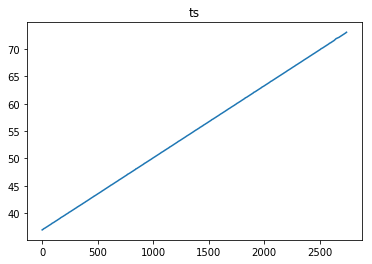

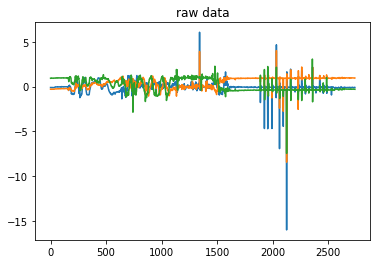

before print(newAcc.values)
[[-0.10986328125 -0.29931640625 0.9306640625]
 [-0.1103515625 -0.298828125 0.94677734375]
 [-0.1103515625 -0.298828125 0.94677734375]
 ...
 [-0.10986328125 0.96484375 -0.30908203125]
 [-0.10986328125 0.96484375 -0.30908203125]
 [-0.11083984375 0.9521484375 -0.31005859375]]
after print(newAcc.values)
[[-0.1098587673849676 -0.2993182943419161 0.9306719453266451]
 [-0.11029245795485931 -0.2995812103773364 0.9473914444865543]
 [-0.11042647685662427 -0.29757103857259004 0.9458242207601937]
 ...
 [-0.10991711592526701 0.9646963436345851 -0.30845246611531835]
 [-0.10992566794710083 0.964845436260847 -0.30948187588086185]
 [-0.11080565249035698 0.9521112088115649 -0.3099915902400871]]


C:\Users\yd716\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


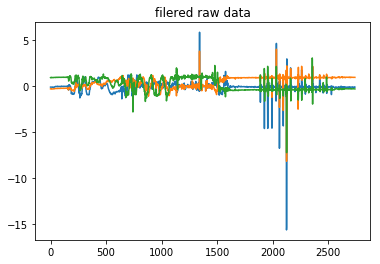

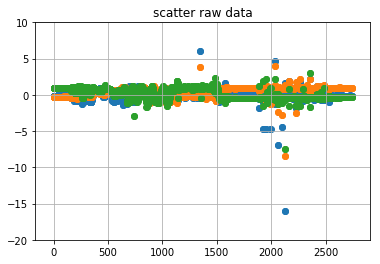

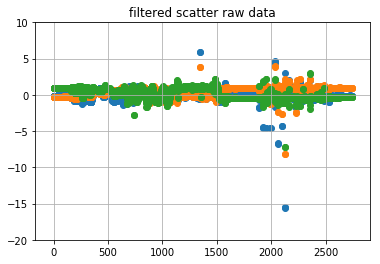

samplerate is  75.86195448282731


In [36]:
from package.temp_package import *
pathway=Reader.get_UpperPath('.')+'/190709github_package_data/10-04-22_raw.csv'
Reader.figure(path=pathway)
raw=Reader.export()
raw=raw[0:-3]
plt.title('ts')
plt.plot(raw[:,0])
plt.show()
plt.title('raw data')
plt.plot(raw[:,1:4])
plt.show()
acc=raw[:,1:4]
acc=Signal(acc)

newAcc=acc.copy()
b, a = sp.signal.butter(4, 2*15/samplerate, btype = 'lowpass')
newAcc.values=acc.values
print('before print(newAcc.values)')
print(newAcc.values)
newAcc.values = sp.signal.filtfilt(b, a, acc.values,axis=0)
print('after print(newAcc.values)')
print(newAcc.values)
plt.title('filered raw data')
plt.plot(newAcc.values[:,0:3])
plt.show()

plt.title('scatter raw data')
plt.scatter(np.arange(len(raw)),raw[:,1])
plt.scatter(np.arange(len(raw)),raw[:,2])
plt.scatter(np.arange(len(raw)),raw[:,3])
plt.ylim([-20,10])
plt.grid()
plt.show()


plt.title('filtered scatter raw data')
plt.scatter(np.arange(len(raw)),newAcc.values[:,0])
plt.scatter(np.arange(len(raw)),newAcc.values[:,1])
plt.scatter(np.arange(len(raw)),newAcc.values[:,2])
plt.ylim([-20,10])
plt.grid()
plt.show()

delt=raw[-1,0]-raw[0,0]
samplerate=1/(delt/len(raw))
print('samplerate is ',samplerate)


C:\Users\yd716\Documents
parameter setting...
path C:/Users/yd716/Documents/190709github_package_data/133328_raw.csv


C:\Users\yd716\Documents\190910github_package\package\file.py:109: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  cls.df = pd.read_csv(cls.path, sep=cls.seperate, header=cls.header,encoding=cls.encoding)


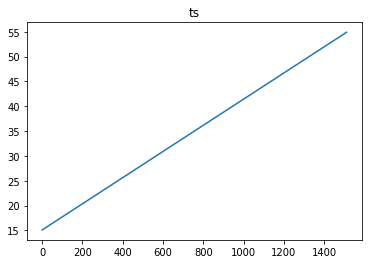

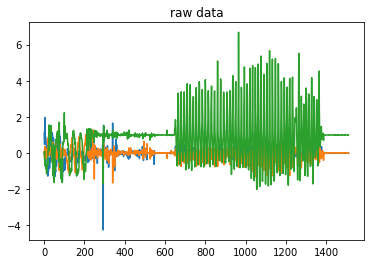

C:\Users\yd716\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


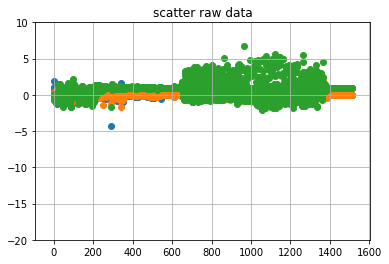

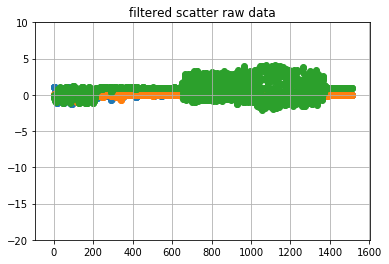

In [35]:
from package.temp_package import *
pathway=Reader.get_UpperPath('.')+'/190709github_package_data/133328_raw.csv'
Reader.figure(path=pathway)
raw=Reader.export()
raw=raw[0:-3]
plt.title('ts')
plt.plot(raw[:,0])
plt.show()
plt.title('raw data')
plt.plot(raw[:,1:4])
plt.show()
acc=raw[:,1:4]
acc=Signal(acc)
samplerate=40
newAcc=acc.copy()
b, a = sp.signal.butter(4, 2*5/samplerate, btype = 'lowpass')
newAcc.values=acc.values
newAcc.values = sp.signal.filtfilt(b, a, acc.values,axis=0)

plt.title('scatter raw data')
plt.scatter(np.arange(len(raw)),raw[:,1])
plt.scatter(np.arange(len(raw)),raw[:,2])
plt.scatter(np.arange(len(raw)),raw[:,3])
plt.ylim([-20,10])
plt.grid()
plt.show()


plt.title('filtered scatter raw data')
plt.scatter(np.arange(len(raw)),newAcc.values[:,0])
plt.scatter(np.arange(len(raw)),newAcc.values[:,1])
plt.scatter(np.arange(len(raw)),newAcc.values[:,2])
plt.ylim([-20,10])
plt.grid()
plt.show()



C:\Users\yd716\Documents
parameter setting...
path C:/Users/yd716/Documents/190709github_package_data/133328_raw.csv


C:\Users\yd716\Documents\190910github_package\package\file.py:109: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  cls.df = pd.read_csv(cls.path, sep=cls.seperate, header=cls.header,encoding=cls.encoding)


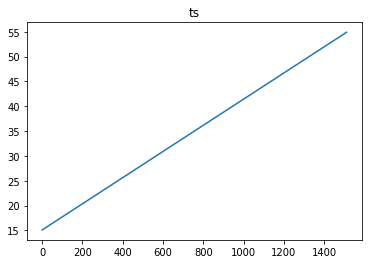

C:\Users\yd716\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


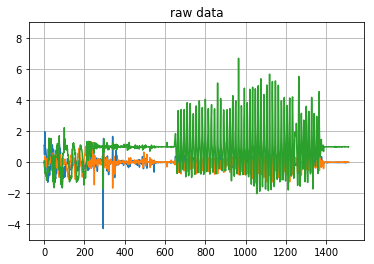

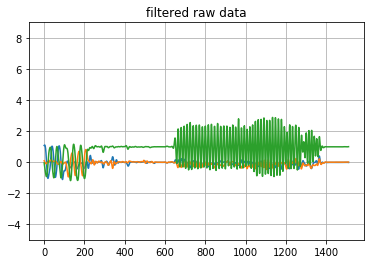

samplerate is  37.977411477718164


In [30]:
from package.temp_package import *
pathway=Reader.get_UpperPath('.')+'/190709github_package_data/133328_raw.csv'
Reader.figure(path=pathway)
raw=Reader.export()
raw=raw[0:-3]
plt.title('ts')
plt.plot(raw[:,0])
plt.show()
#plt.title('raw data')
##plt.plot(raw[:,1:4])
#plt.show()
acc=raw[:,1:4]
acc=Signal(acc)
samplerate=40
newAcc=acc.copy()
b, a = sp.signal.butter(4, 2*3/samplerate, btype = 'lowpass')
newAcc.values=acc.values
newAcc.values = sp.signal.filtfilt(b, a, acc.values,axis=0)

plt.title('raw data')
plt.plot(np.arange(len(raw)),acc.values)
plt.ylim([-5,9])
plt.grid()
plt.show()

plt.title('filtered raw data')
plt.plot(np.arange(len(raw)),newAcc.values)
plt.ylim([-5,9])
plt.grid()
plt.show()


delt=raw[-1,0]-raw[0,0]
samplerate=1/(delt/len(raw))
print('samplerate is ',samplerate)


C:\Users\yd716\Documents
parameter setting...
path C:/Users/yd716/Documents/190709github_package_data/142417_raw.csv


C:\Users\yd716\Documents\190910github_package\package\file.py:109: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  cls.df = pd.read_csv(cls.path, sep=cls.seperate, header=cls.header,encoding=cls.encoding)


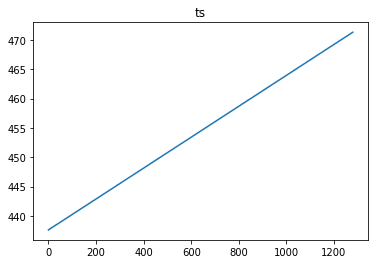

C:\Users\yd716\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


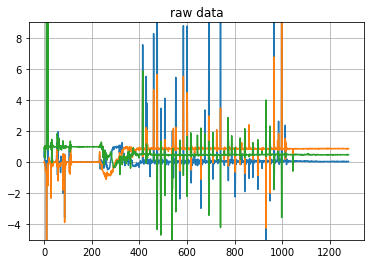

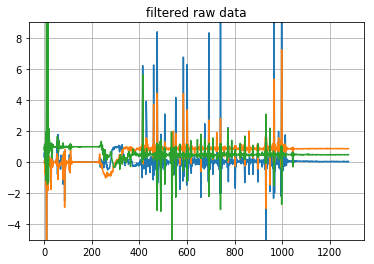

samplerate is  37.98039262230875


In [33]:
from package.temp_package import *
pathway=Reader.get_UpperPath('.')+'/190709github_package_data/142417_raw.csv'
Reader.figure(path=pathway)
raw=Reader.export()
raw=raw[0:-3]
plt.title('ts')
plt.plot(raw[:,0])
plt.show()
#plt.title('raw data')
##plt.plot(raw[:,1:4])
#plt.show()
acc=raw[:,1:4]
acc=Signal(acc)
samplerate=40
newAcc=acc.copy()
b, a = sp.signal.butter(4, 2*15/samplerate, btype = 'lowpass')
newAcc.values=acc.values
newAcc.values = sp.signal.filtfilt(b, a, acc.values,axis=0)

plt.title('raw data')
plt.plot(np.arange(len(raw)),acc.values)
plt.ylim([-5,9])
plt.grid()
plt.show()

plt.title('filtered raw data')
plt.plot(np.arange(len(raw)),newAcc.values)
plt.ylim([-5,9])
plt.grid()
plt.show()


delt=raw[-1,0]-raw[0,0]
samplerate=1/(delt/len(raw))
print('samplerate is ',samplerate)
